In [113]:
import pandas as pd

df = pd.read_csv("./etl/outputs/2024_2025_cleaned.csv")
df.head(5)
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK', 'xG_90', 'xAG_90',
       'xG+xAG', 'npxG_90', 'npxG+xAG_90', 'Matches'],
      dtype='object')

In [ ]:
df[df["Pos"].isin(['MF,FW', 'FW', 'FW,MF', 'FW,DF', 'MF'])]


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast_90,G+A_90,G-PK_90,G+A-PK,xG_90,xAG_90,xG+xAG,npxG_90,npxG+xAG_90,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24.0,1999.0,32,32,...,0.03,0.22,0.10,0.13,0.20,0.10,0.30,0.10,0.20,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2003.0,34,33,...,0.07,0.36,0.26,0.33,0.28,0.12,0.40,0.25,0.37,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24.0,2000.0,26,22,...,0.09,0.43,0.28,0.38,0.48,0.07,0.56,0.41,0.48,Matches
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,26.0,1997.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2838,Edon Zhegrova,xk KVX,"FW,MF",Lille,fr Ligue 1,25.0,1999.0,12,12,...,0.09,0.46,0.37,0.46,0.21,0.21,0.41,0.21,0.41,Matches
2841,2842,Joshua Zirkzee,nl NED,"FW,MF",Manchester Utd,eng Premier League,23.0,2001.0,32,14,...,0.06,0.26,0.19,0.26,0.31,0.10,0.41,0.31,0.41,Matches
2842,2843,Budu Zivzivadze,ge GEO,FW,Heidenheim,de Bundesliga,30.0,1994.0,15,10,...,0.28,0.47,0.19,0.47,0.16,0.14,0.30,0.16,0.30,Matches
2852,2853,Milan Đurić,ba BIH,FW,Monza,it Serie A,34.0,1990.0,18,13,...,0.07,0.35,0.28,0.35,0.21,0.08,0.28,0.21,0.28,Matches


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

ss = StandardScaler()
pca = PCA(n_components=2)

selected_cols = ['npxG', 'xAG','PrgC', 'PrgP', 'PrgR']
X = df[selected_cols].values
transformed_X = ss.fit_transform(X)

In [144]:
pca_val = pca.fit_transform(X=transformed_X)

In [145]:
pca_df = pd.DataFrame(pca_val, columns=["PCA1", "PCA2"])

In [146]:
df["Player"]

0              Max Aarons
1              Max Aarons
2          Rodrigo Abajas
3          James Abankwah
4       Keyliane Abdallah
              ...        
2849         Edhy Zuliani
2850     Szymon Żurkowski
2851      Martin Ødegaard
2852          Milan Đurić
2853          Milan Đurić
Name: Player, Length: 2854, dtype: object

In [147]:
pca_df["player"] = list(df["Player"])

In [148]:
pca_df

,PCA1,PCA2,player
0,-1.573712,-0.124868,Max Aarons
1,-1.549043,-0.186237,Max Aarons
2,-1.565367,-0.230301,Rodrigo Abajas
3,-1.567146,-0.192706,James Abankwah
4,-1.656891,-0.232748,Keyliane Abdallah
...,...,...,...
2849,-1.675046,-0.237205,Edhy Zuliani
2850,-1.608996,-0.254149,Szymon Żurkowski
2851,5.343344,2.571971,Martin Ødegaard
2852,-0.458937,-0.721503,Milan Đurić


In [153]:
high_performance = pca_df[
    (
        (pca_df["PCA1"] >= pca_df["PCA1"].max() * 0.8) &
        (pca_df["PCA1"] <= pca_df["PCA1"].max())
    ) |
    (
        (pca_df["PCA2"] >= pca_df["PCA2"].max() * 0.8) &
        (pca_df["PCA2"] <= pca_df["PCA2"].max())
    )
]


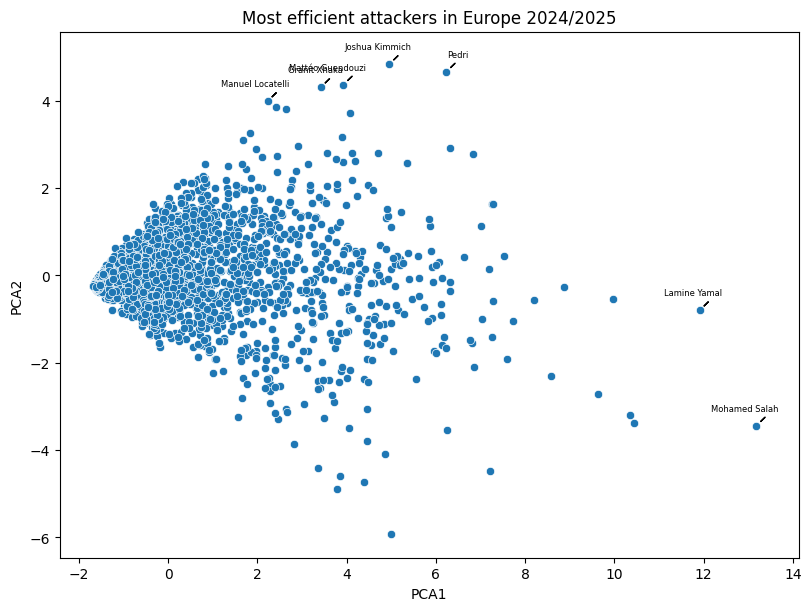

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), layout="constrained")
plt.title("Most efficient attackers in Europe 2024/2025")

ax = sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", )
for _, row in high_performance.iterrows():
    ax.text(x=row["PCA1"] + 0.5, y=row["PCA2"] + 0.5, s=row["player"], fontsize=6, horizontalalignment='right', verticalalignment='top')
    ax.arrow(x=row["PCA1"] + 0.2, y=row["PCA2"] + 0.2, dx=-0.1, dy=-0.1)